In [1]:
import pandas as pd
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [61]:
df = pd.read_csv('encoded_df.csv')

In [62]:
df = df.drop(df[df.home_results > 2].index)

In [63]:
df = df.drop(columns=['Winner', 'Pts', 'Loser', 'Pts.1', 'winners', 
                      'losers', 'win_rank', 'lose_rank', 
                      'null', 'half', 'quart', 'three_quart'])

In [64]:
test = df.iloc[766:]
train = df.iloc[:766]

In [65]:
X_train = train.drop(columns=['home_results'])
X_test = test.drop(columns=['home_results'])

y_train = train['home_results']
y_test = test['home_results']

In [66]:
# LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
#                            priors=None, shrinkage=0.5, solver='eigen',
#                            store_covariance=False, tol=0.0001)


LogisticRegression(C=4.432, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


LogisticRegression(C=4.432, class_weight={}, max_iter=1000, random_state=123)

In [67]:
clf = LogisticRegression()

In [68]:
clf.fit(X_train, y_train)

LogisticRegression()

In [69]:
predictions = clf.predict(X_test)

In [70]:
data = {'y_test': y_test, 'y_pred': predictions}
new_df = pd.DataFrame(data)
diff = (new_df['y_test'] - (new_df['y_pred'])).abs()
new_df['diff'] = diff
new_df = new_df.sort_values(by='diff', ascending=True)
new_df

,y_test,y_pred,diff
840,1,1,0
813,1,1,0
820,0,0,0
839,1,1,0
808,1,1,0
...,...,...,...
810,1,0,1
811,0,1,1
812,0,1,1
794,1,0,1


In [71]:
wrongs = new_df[new_df['diff'] == 1]

In [72]:
len(wrongs)

33

In [73]:
new_df.shape

(63, 3)

In [74]:
30/63

0.47619047619047616

In [75]:
from sklearn.metrics import confusion_matrix

# cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('True Negative(TN)  = ', TN)
print('False Positive(FP) = ', FP)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  17
True Negative(TN)  =  13
False Positive(FP) =  19
False Negative(FN) =  14


In [41]:
# True Positive(TP)  =  15
# True Negative(TN)  =  15
# False Positive(FP) =  17
# False Negative(FN) =  16


# True Positive(TP)  =  17
# True Negative(TN)  =  13
# False Positive(FP) =  19
# False Negative(FN) =  14


In [78]:
# from imblearn.under_sampling import TomekLinks

In [76]:
X = df.drop(columns=['home_results'])
y = df['home_results']


In [77]:
# print(__doc__)
# import seaborn as sns

# sns.set_context("poster")

In [79]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import LinearSVC
# from sklearn.model_selection import train_test_split

# from imblearn import over_sampling as os
# from imblearn import pipeline as pl
# from imblearn.metrics import classification_report_imbalanced

# print(__doc__)

# RANDOM_STATE = 42

# pipeline = pl.make_pipeline(
#     StandardScaler(),
#     os.SMOTE(random_state=RANDOM_STATE),
#     LinearSVC(max_iter=10_000, random_state=RANDOM_STATE),
# )

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

# # Train the classifier with balancing
# pipeline.fit(X_train, y_train)

# # Test the classifier and get the prediction
# y_pred_bal = pipeline.predict(X_test)

# # Show the classification report
# print(classification_report_imbalanced(y_test, y_pred_bal))


In [80]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

In [81]:
# from imblearn.under_sampling import RandomUnderSampler

# sampling_strategy = 0.8
# rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
# X_res, y_res = rus.fit_resample(X, y)
# ax = y_res.value_counts().plot.pie(autopct='%.2f')
# _ = ax.set_title("Under-sampling")

In [82]:
# from sklearn.datasets import make_classification
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn import preprocessing

# pipe = make_pipeline(StandardScaler(), LogisticRegression())
# pipe.fit(X_train, y_train)  # apply scaling on training data
# Pipeline(steps=[('standardscaler', StandardScaler()),
#                 ('logisticregression', LogisticRegression())])

# pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.


In [83]:
# X_normalized = preprocessing.normalize(X, norm='l2')

In [84]:
# normalizer = preprocessing.Normalizer().fit(X)  # fit does nothing
# normalizer

In [85]:
# normalizer.transform(X)


Prediction accuracy for the normal test dataset with PCA
64.66%


Prediction accuracy for the standardized test dataset with PCA
64.66%


PC 1 without scaling:
[-2.88081429e-03  2.65441147e-02  5.75501294e-02  3.17568421e-02
 -9.97476330e-01 -4.71916384e-04  2.71010266e-03]

PC 1 with scaling:
[-0.13847182  0.33506816  0.44243809 -0.08200299 -0.24670209 -0.574364
  0.52471231]


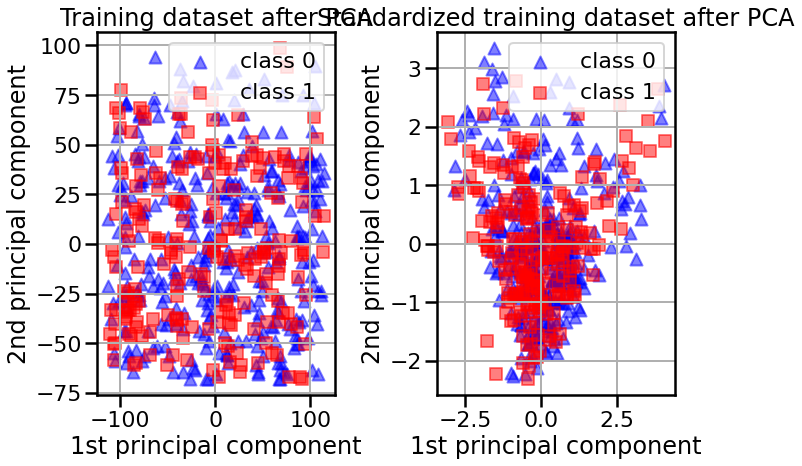

In [93]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline


RANDOM_STATE = 42
FIG_SIZE = (10, 7)



# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=RANDOM_STATE
)

# Fit to data and predict using pipelined GNB and PCA
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

# Fit to data and predict using pipelined scaling, GNB and PCA
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

# Show prediction accuracies in scaled and unscaled data.
print("\nPrediction accuracy for the normal test dataset with PCA")
print(f"{accuracy_score(y_test, pred_test):.2%}\n")

print("\nPrediction accuracy for the standardized test dataset with PCA")
print(f"{accuracy_score(y_test, pred_test_std):.2%}\n")

# Extract PCA from pipeline
pca = unscaled_clf.named_steps["pca"]
pca_std = std_clf.named_steps["pca"]

# Show first principal components
print(f"\nPC 1 without scaling:\n{pca.components_[0]}")
print(f"\nPC 1 with scaling:\n{pca_std.components_[0]}")

# Use PCA without and with scale on X_train data for visualization.
X_train_transformed = pca.transform(X_train)

scaler = std_clf.named_steps["standardscaler"]
scaled_X_train = scaler.transform(X_train)
X_train_std_transformed = pca_std.transform(scaled_X_train)

# visualize standardized vs. untouched dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)

target_classes = range(0, 2)
colors = ("blue", "red")
markers = ("^", "s", "o")

for target_class, color, marker in zip(target_classes, colors, markers):
    ax1.scatter(
        x=X_train_transformed[y_train == target_class, 0],
        y=X_train_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

    ax2.scatter(
        x=X_train_std_transformed[y_train == target_class, 0],
        y=X_train_std_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

ax1.set_title("Training dataset after PCA")
ax2.set_title("Standardized training dataset after PCA")

for ax in (ax1, ax2):
    ax.set_xlabel("1st principal component")
    ax.set_ylabel("2nd principal component")
    ax.legend(loc="upper right")
    ax.grid()

plt.tight_layout()

plt.show()

In [94]:
from sklearn.decomposition import PCA

In [96]:
pca = PCA(n_components='mle')
pca.fit(X)

PCA(n_components='mle')

In [97]:
print(pca.explained_variance_ratio_)

[0.53631133 0.19382104 0.15622159 0.11036165 0.00200595 0.00122232]


In [98]:
print(pca.singular_values_)

[1870.97641998 1124.76108647 1009.78833731  848.72876523  114.42461919
   89.3208581 ]


https://towardsdatascience.com/visualising-the-classification-power-of-data-54f5273f640